In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('housing_price_dataset.csv')

# Menampilkan dataset
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [36]:
# Menampilkan kategori di variaabel 'Neighborhood'
df['Neighborhood'].value_counts()

Neighborhood
Suburb    16721
Rural     16676
Urban     16603
Name: count, dtype: int64

In [37]:
# Statistik deskriptif
print(df.describe())

# Menampilkan informasi umum dataset
print(df.info())

         SquareFeet      Bedrooms     Bathrooms     YearBuilt          Price
count  50000.000000  50000.000000  50000.000000  50000.000000   50000.000000
mean    2006.374680      3.498700      1.995420   1985.404420  224827.325151
std      575.513241      1.116326      0.815851     20.719377   76141.842966
min     1000.000000      2.000000      1.000000   1950.000000  -36588.165397
25%     1513.000000      3.000000      1.000000   1967.000000  169955.860225
50%     2007.000000      3.000000      2.000000   1985.000000  225052.141166
75%     2506.000000      4.000000      3.000000   2003.000000  279373.630052
max     2999.000000      5.000000      3.000000   2021.000000  492195.259972
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 no

In [39]:
# Menampilkan data yang hilang
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [40]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Convert 'Neighborhoof' to binary
df['Neighborhood'] = df['Neighborhood'].apply(lambda x: 0 if x == 'Suburb' else 1 if x == 'Rural' else 2)
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,1,1969,215355.283618
1,2459,3,2,1,1980,195014.221626
2,1860,2,1,0,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,0,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,1,1975,100080.865895
49996,2854,2,2,0,1988,374507.656727
49997,2979,5,3,0,1962,384110.555590
49998,2596,5,2,1,1984,380512.685957


In [41]:
df['Neighborhood'].value_counts()

Neighborhood
0    16721
1    16676
2    16603
Name: count, dtype: int64

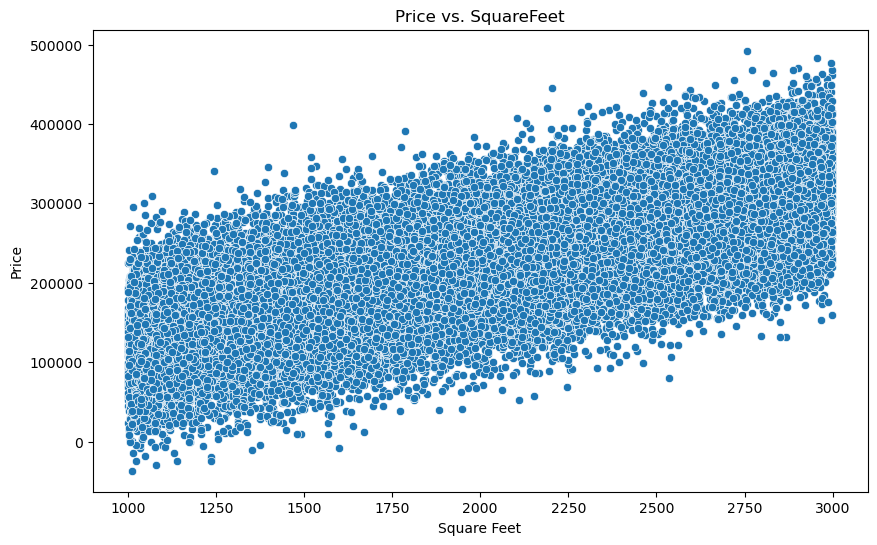

In [42]:
# Scatter plot for Price vs. SquareFeet
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SquareFeet', y='Price', data=df)
plt.title('Price vs. SquareFeet')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.show()

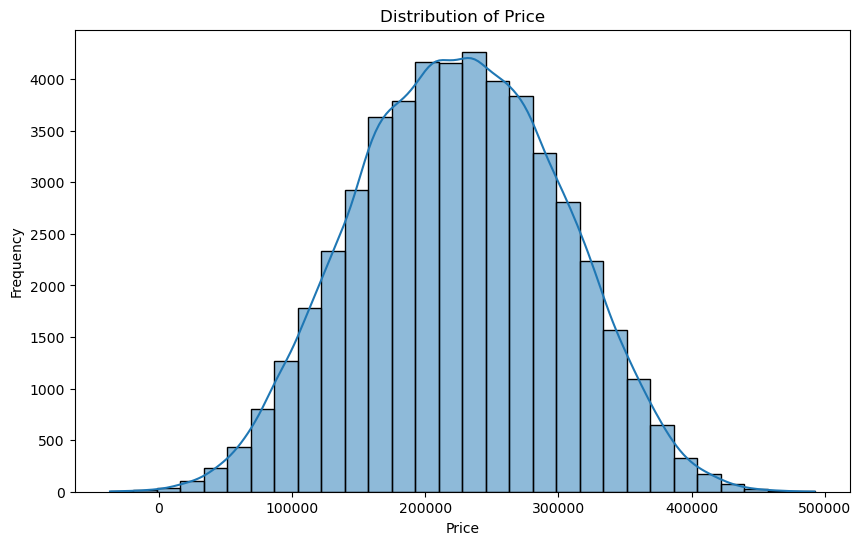

In [44]:
# Histogram for Price
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


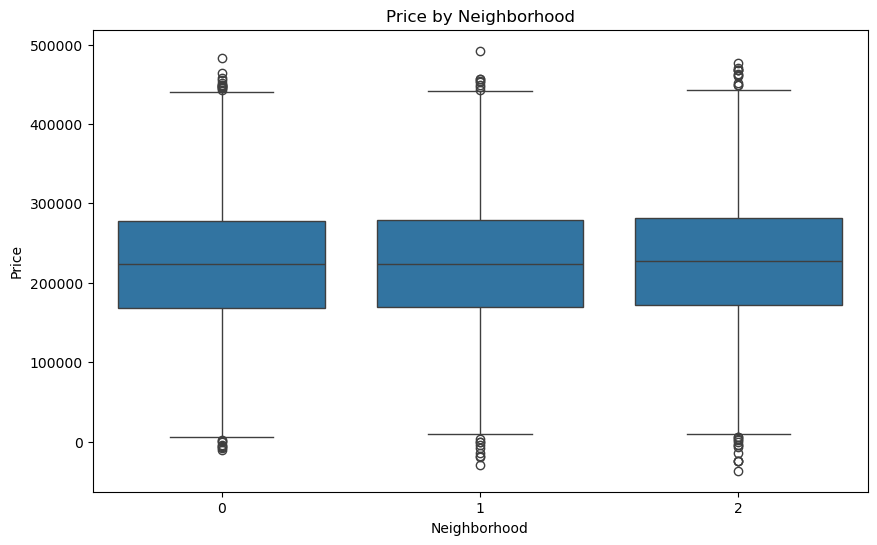

In [45]:
# Box plot for Price by Neighborhood
plt.figure(figsize=(10, 6))
sns.boxplot(x='Neighborhood', y='Price', data=df)
plt.title('Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.show()

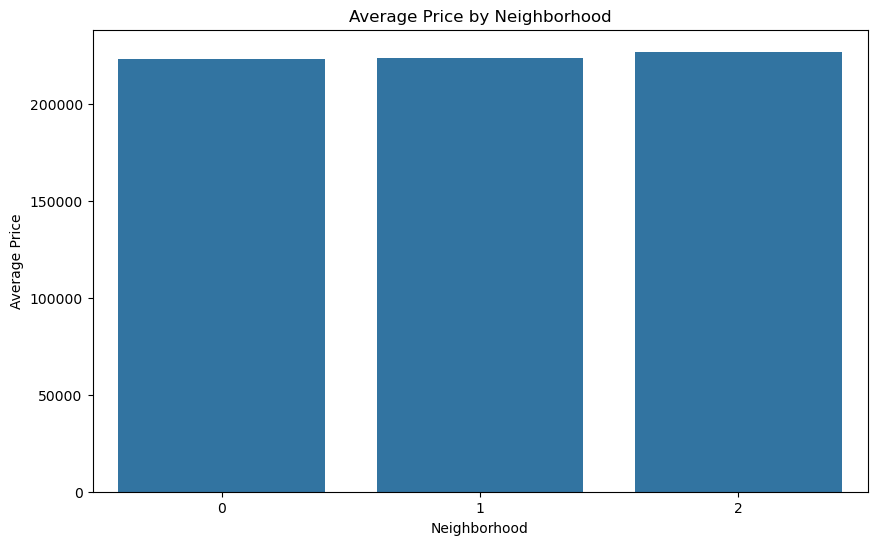

In [46]:
# Bar chart for Average Price by Neighborhood
plt.figure(figsize=(10, 6))
avg_price_neighborhood = df.groupby('Neighborhood')['Price'].mean().reset_index()
sns.barplot(x='Neighborhood', y='Price', data=avg_price_neighborhood)
plt.title('Average Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.show()

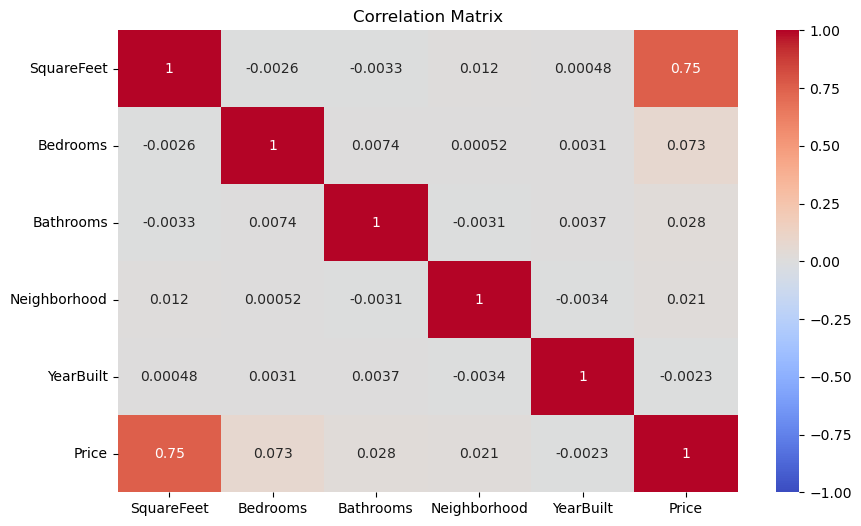

In [47]:
# Heatmap for correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [48]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Scale numerical features
numeric_cols = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Neighborhood']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Splitting the dataset into training and testing sets
X = df.drop('Price', axis=1)
y = LabelEncoder().fit_transform(df['Price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# Model Training and Comparison
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate models
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_lr)
accuracy_svc = accuracy_score(y_test, y_pred_svm)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f'Akurasi Decision Tree: {accuracy_dt}')
print(f'Akurasi Logistik {accuracy_rf}')
print(f'Akurasi SVC: {accuracy_svc}')
print(f'Akurasi Random Forest: {accuracy_rf}')

print("Laporan Klasifikasi Decision Tree:\n", classification_report(y_test, y_pred_dt))
print("Laporan Klasifikasi Logistik:\n", classification_report(y_test, y_pred_lr))
print("Laporan Klasifikasi SVC:\n", classification_report(y_test, y_pred_svm))
print("Laporan Klasifikasi Random Forest:\n", classification_report(y_test, y_pred_rf))